In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
# Check for missing values
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [5]:
# Check for duplicates
df.duplicated().sum()

403

In [6]:
# delete duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 325.1 kB/s eta 0:00:05
   -------- ------------------------------- 0.3/1.5 MB 2.1 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.5 MB 3.9 MB/s eta 0:00:01
   ----------------------- ---------------- 0.9/1.5 MB 4.1 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 3.8 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 3.8 MB/s eta 0:00:01
   ------------------------------ --------- 1.1/1.5 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# Bag of words Tokenization
from nltk.tokenize import word_tokenize
df['tokenized'] = df['v2'].apply(word_tokenize)
df

,v1,v2,tokenized
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,ham,Will Ì_ b going to esplanade fr home?,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,ham,The guy did some bitching but I acted like i'd...,"[The, guy, did, some, bitching, but, I, acted,..."


In [11]:
# REmove stop words from v2
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df['stopwords_removed'] = df['tokenized'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,v1,v2,tokenized,stopwords_removed
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, jurong, point, ,, crazy, .., Available, b..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, early, hor, ..., U, c, already, ..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, n't, think, goes, usf, ,, lives, around,..."
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u., U, å£750, P..."
5568,ham,Will Ì_ b going to esplanade fr home?,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]","[Ì_, b, going, esplanade, fr, home, ?]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[Pity, ,, *, was, in, mood, for, that, ., So, ...","[Pity, ,, *, mood, ., ..., suggestions, ?]"
5570,ham,The guy did some bitching but I acted like i'd...,"[The, guy, did, some, bitching, but, I, acted,...","[guy, bitching, acted, like, 'd, interested, b..."


- Tasks:
    1. Perform EDA on the text data:
        - Find the 10 most frequent words for each class (remove stopwords first)
        - Find the 10 most frequent bi-rgams each class  (remove stopwords first)
        - Find the 10 most frequent tri-rgams each class  (remove stopwords first)
        - Create wordcloud each class (remove stopwords first)

In [12]:
# 10 most common words for each Spam and Ham
from collections import Counter

def get_most_common_words(df, category, num_words):
    words = df[df['v1'] == category]['stopwords_removed'].tolist()
    words = [word for sublist in words for word in sublist]
    return Counter(words).most_common(num_words)

print('10 most common words for Spam:')
print(get_most_common_words(df, 'spam', 10))



10 most common words for Spam:
[('.', 859), ('!', 453), (',', 301), ('call', 165), ('&', 160), ('?', 159), ('2', 157), (':', 150), ('Call', 118), ('*', 108)]


In [13]:
#remove numbers and punctuations
import string
def remove_numbers_punctuation(words):
    words = [word for word in words if word.isalpha()]
    return words

df['no_numbers_punctuations'] = df['stopwords_removed'].apply(remove_numbers_punctuation)
#lowercase all words
df['no_numbers_punctuations'] = df['no_numbers_punctuations'].apply(lambda x: [word.lower() for word in x])
#remove words if length is less than 2
df['no_numbers_punctuations'] = df['no_numbers_punctuations'].apply(lambda x: [word for word in x if len(word) > 1])
df

,v1,v2,tokenized,stopwords_removed,no_numbers_punctuations
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, jurong, point, ,, crazy, .., Available, b...","[go, jurong, point, crazy, available, bugis, g..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]","[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, early, hor, ..., U, c, already, ...","[dun, say, early, hor, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, n't, think, goes, usf, ,, lives, around,...","[nah, think, goes, usf, lives, around, though]"
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u., U, å£750, P...","[time, tried, contact, pound, prize, claim, ea..."
5568,ham,Will Ì_ b going to esplanade fr home?,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]","[Ì_, b, going, esplanade, fr, home, ?]","[going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[Pity, ,, *, was, in, mood, for, that, ., So, ...","[Pity, ,, *, mood, ., ..., suggestions, ?]","[pity, mood, suggestions]"
5570,ham,The guy did some bitching but I acted like i'd...,"[The, guy, did, some, bitching, but, I, acted,...","[guy, bitching, acted, like, 'd, interested, b...","[guy, bitching, acted, like, interested, buyin..."


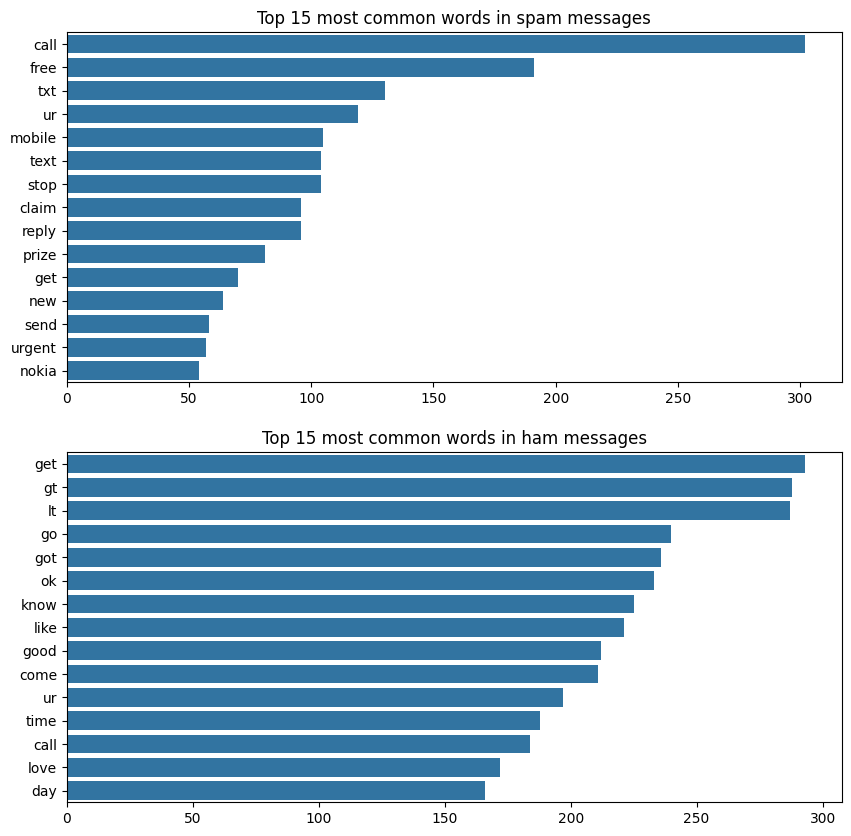

In [14]:
#plotting the most common words in SPAM
import matplotlib.pyplot as plt
import seaborn as sns

def get_most_common_words(df, category, num_words):
    words = df[df['v1'] == category]['no_numbers_punctuations'].tolist()
    words = [word for sublist in words for word in sublist]
    return Counter(words).most_common(num_words)

common_words = get_most_common_words(df, 'spam', 15)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.title('Top 15 most common words in spam messages')
sns.barplot(y=words, x=counts)

# plot the most common words in HAM
common_words = get_most_common_words(df, 'ham', 15)
words, counts = zip(*common_words)

plt.subplot(2, 1, 2)
plt.title('Top 15 most common words in ham messages')
sns.barplot(y=words, x=counts)
plt.show()


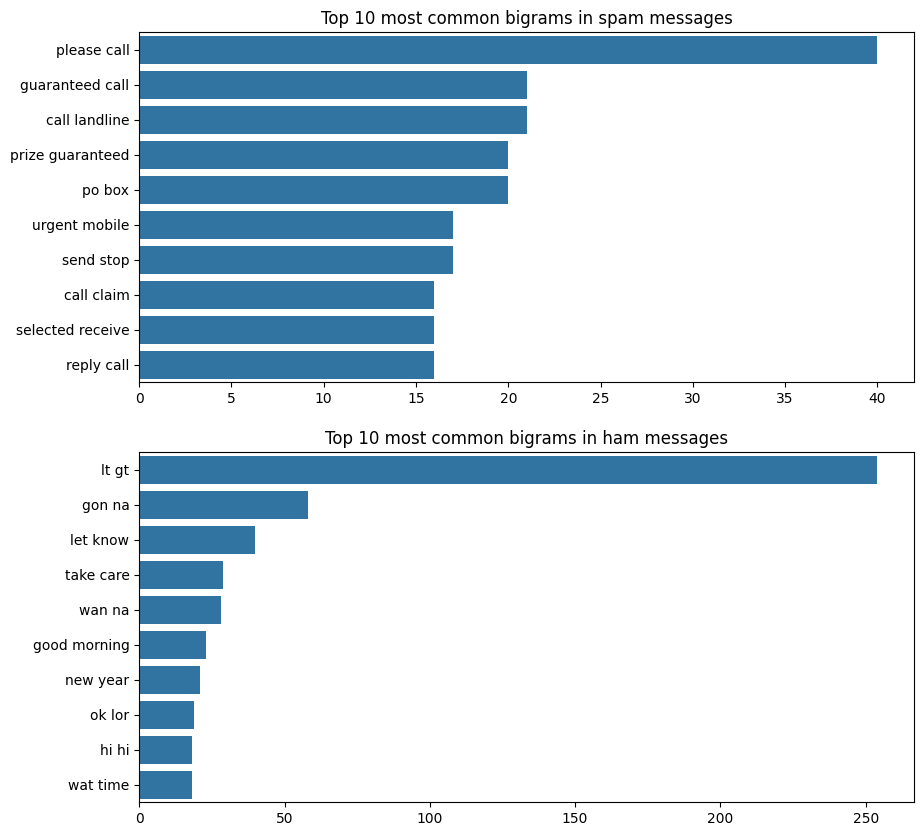

In [15]:
#Find the 10 most frequent bi-rgams each class  (remove stopwords first)
from nltk.util import ngrams

def get_most_common_ngrams(df, category, num_ngrams, n):
    words = df[df['v1'] == category]['no_numbers_punctuations'].tolist()
    words = [word for sublist in words for word in sublist]
    ngrams_list = list(ngrams(words, n))
    return Counter(ngrams_list).most_common(num_ngrams)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
common_ngrams = get_most_common_ngrams(df, 'spam', 10, 2)
words, counts = zip(*common_ngrams)
words = [str(word[0]+ " " + word[1]) for word in words]
plt.title('Top 10 most common bigrams in spam messages')
sns.barplot(y=words, x=counts)

plt.subplot(2, 1, 2)
common_ngrams = get_most_common_ngrams(df, 'ham', 10, 2)
words, counts = zip(*common_ngrams)
words = [str(word[0]+ " " + word[1]) for word in words]
plt.title('Top 10 most common bigrams in ham messages')
sns.barplot(y=words, x=counts)
plt.show()


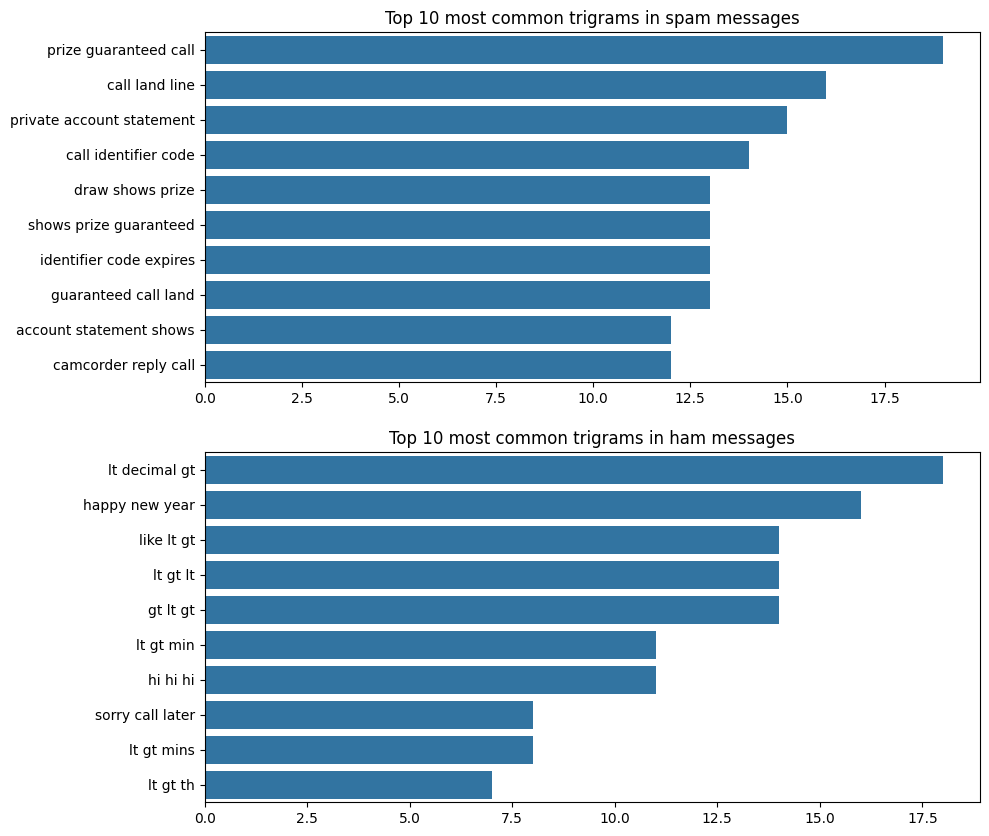

In [16]:
# Find the 10 most frequent tri-rgams each class  (remove stopwords first)
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
common_ngrams = get_most_common_ngrams(df, 'spam', 10, 3)
words, counts = zip(*common_ngrams)
words = [str(word[0]+ " " + word[1] + " " + word[2]) for word in words]
plt.title('Top 10 most common trigrams in spam messages')
sns.barplot(y=words, x=counts)

plt.subplot(2, 1, 2)
common_ngrams = get_most_common_ngrams(df, 'ham', 10, 3)
words, counts = zip(*common_ngrams)
words = [str(word[0]+ " " + word[1] + " " + word[2]) for word in words]
plt.title('Top 10 most common trigrams in ham messages')
sns.barplot(y=words, x=counts)
plt.show()

In [17]:
pip install wordcloud

   ---------------------------------------- 0.0/300.6 kB ? eta -:--:--
   ---------------------------------------- 300.6/300.6 kB 6.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


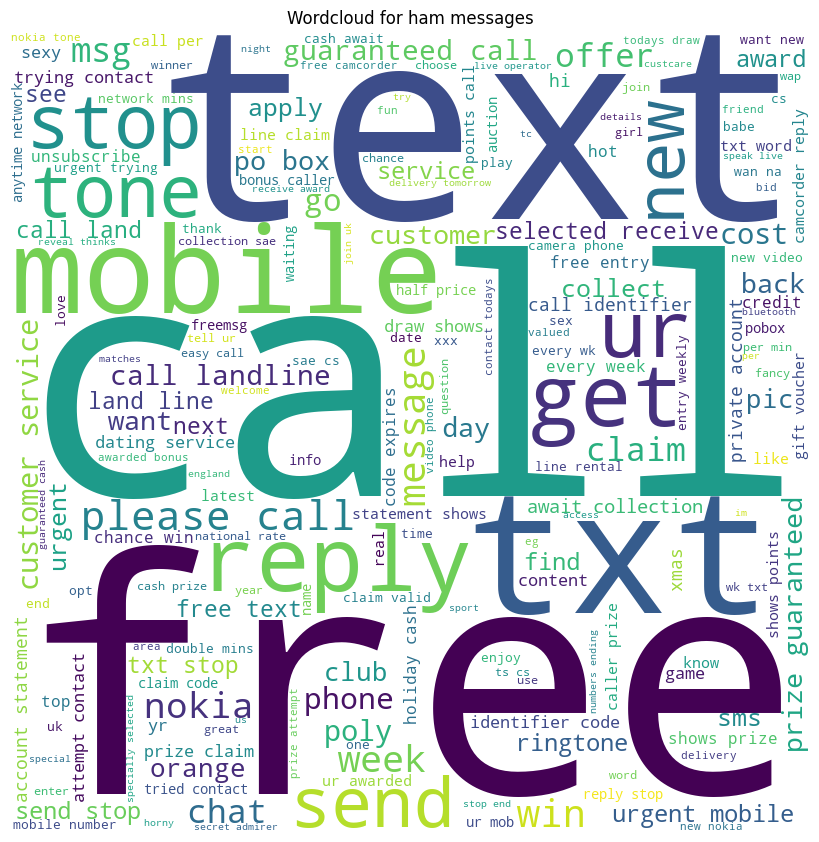

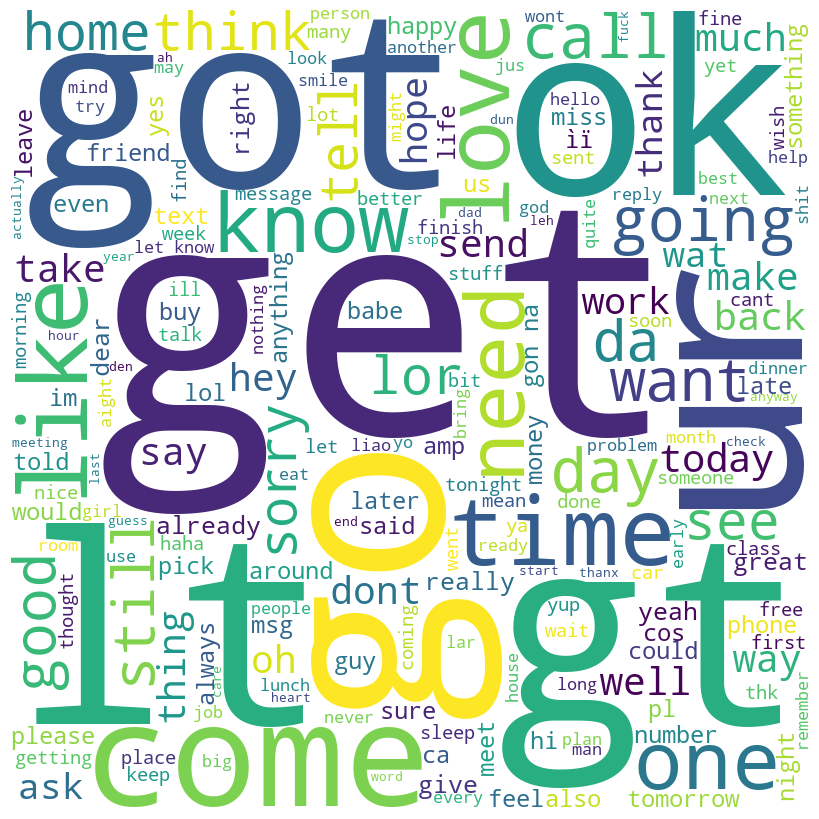

In [18]:
# create wordcloud for ham and spam

from wordcloud import WordCloud

def create_wordcloud(df, category):
    words = df[df['v1'] == category]['no_numbers_punctuations'].tolist()
    words = [word for sublist in words for word in sublist]
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stop_words,
                    min_font_size = 10).generate(' '.join(words))
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)


create_wordcloud(df, 'spam')
plt.title('Wordcloud for spam messages')

plt.title('Wordcloud for ham messages')
create_wordcloud(df, 'ham')



# Bag of Words without Cleaning

In [19]:
bow = df['v2'].apply(word_tokenize)
bow = bow.to_list()
bow

[['Go',
  'until',
  'jurong',
  'point',
  ',',
  'crazy',
  '..',
  'Available',
  'only',
  'in',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  '...',
  'Cine',
  'there',
  'got',
  'amore',
  'wat',
  '...'],
 ['Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...'],
 ['Free',
  'entry',
  'in',
  '2',
  'a',
  'wkly',
  'comp',
  'to',
  'win',
  'FA',
  'Cup',
  'final',
  'tkts',
  '21st',
  'May',
  '2005',
  '.',
  'Text',
  'FA',
  'to',
  '87121',
  'to',
  'receive',
  'entry',
  'question',
  '(',
  'std',
  'txt',
  'rate',
  ')',
  'T',
  '&',
  'C',
  "'s",
  'apply',
  '08452810075over18',
  "'s"],
 ['U',
  'dun',
  'say',
  'so',
  'early',
  'hor',
  '...',
  'U',
  'c',
  'already',
  'then',
  'say',
  '...'],
 ['Nah',
  'I',
  'do',
  "n't",
  'think',
  'he',
  'goes',
  'to',
  'usf',
  ',',
  'he',
  'lives',
  'around',
  'here',
  'though'],
 ['FreeMsg',
  'Hey',
  'there',
  'darling',
  'it',
  "'s",
  'been',
  '3',
  'week',
  "'s"

In [20]:
y = df['v1'].to_list()
y

['ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'spam',
 'ham',
 'spam',
 'spam',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'spam',
 'ham',
 'spam',
 '

In [21]:
y = [1 if x == 'spam' else 0 for x in y]
y

[0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [22]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [23]:
#convert the text to a matrix of token counts
X = cv.fit_transform(df['v2']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
# Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.9202898550724637

In [25]:
#TFIDF
X = tfidf.fit_transform(df['v2']).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

f1_score(y_test, y_pred)


0.8669201520912547

In [26]:
df['no_numbers_punctuations'] = df['no_numbers_punctuations'].apply(lambda x: ' '.join(x))
df['no_numbers_punctuations']

0       go jurong point crazy available bugis great wo...
1                                   ok lar joking wif oni
2       free entry wkly comp win fa cup final tkts may...
3                           dun say early hor already say
4                  nah think goes usf lives around though
                              ...                        
5567    time tried contact pound prize claim easy call...
5568                              going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: no_numbers_punctuations, Length: 5169, dtype: object

In [27]:
tfidf = TfidfVectorizer(max_features=3000)

#lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

df['no_numbers_punctuations'] = df['no_numbers_punctuations'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
X = tfidf.fit_transform(df['no_numbers_punctuations'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

f1_score(y_test, y_pred)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhya\AppData\Roaming\nltk_data...


0.7984189723320159

<BarContainer object of 3 artists>

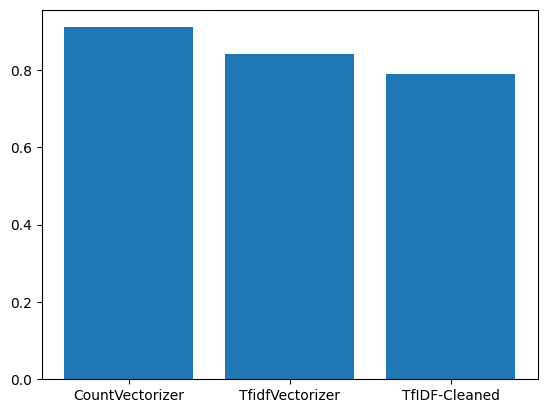

In [28]:
#plot all accuracies
import numpy as np

accuracies = [0.91,0.84,0.79]
plt.bar(['CountVectorizer','TfidfVectorizer','TfIDF-Cleaned'],accuracies)